# Data Respresentation in Scikit-Learn

In [3]:
# Will refer to the rows as samples and number of rows as n_samples
# Each column refers to a particular quantitative piece of info that describes
# each sample. Wil refer as n_features
import seaborn as sns
iris = sns.load_dataset('iris')
# Returns the first n rows
iris.head()

,sepal_length,sepal_width,petal_length,petal_width,species
0,5.1,3.5,1.4,0.2,setosa
1,4.9,3.0,1.4,0.2,setosa
2,4.7,3.2,1.3,0.2,setosa
3,4.6,3.1,1.5,0.2,setosa
4,5.0,3.6,1.4,0.2,setosa


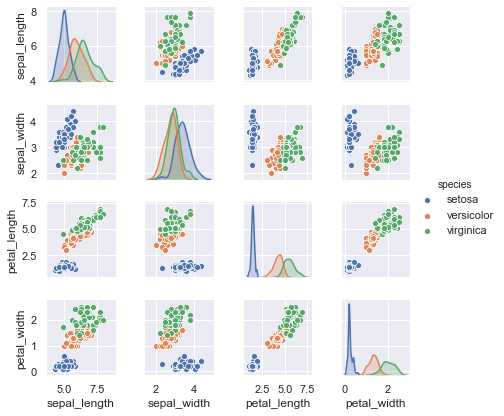

In [7]:
# Feature Matrix(n_samples x n_features) and Target array(usually 1D i.e n_samples)
%matplotlib inline
import seaborn as sns
sns.set()
sns.pairplot(iris, hue='species', height=1.5)

In [8]:
# Extracting the feature matrix and target array
X_iris = iris.drop('species',axis = 1)
X_iris

,sepal_length,sepal_width,petal_length,petal_width
0,5.1,3.5,1.4,0.2
1,4.9,3.0,1.4,0.2
2,4.7,3.2,1.3,0.2
3,4.6,3.1,1.5,0.2
4,5.0,3.6,1.4,0.2
...,...,...,...,...
145,6.7,3.0,5.2,2.3
146,6.3,2.5,5.0,1.9
147,6.5,3.0,5.2,2.0
148,6.2,3.4,5.4,2.3


In [9]:
y_iris = iris['species']
y_iris

0         setosa
1         setosa
2         setosa
3         setosa
4         setosa
         ...    
145    virginica
146    virginica
147    virginica
148    virginica
149    virginica
Name: species, Length: 150, dtype: object

# Sklearn Estimator API

In [10]:
# Steps to use Estimator API
# Choose a class model by importing the appropriate estimator class
# Choose model hyperparameters by instantiating class with desired values
# Arrange data into a feature matrix and target vector
# fit the model to your data by calling fit() method 
# Apply the model to the new data
## For supervised learning we predict labels using predict()
## For unsupervised learning we transform or infer properties using transform() or predict()

# Simple Linear Regression

In [26]:
%matplotlib inline
import matplotlib.pyplot as plt
import numpy as np

rng = np.random.RandomState(42)
x = 10 * rng.rand(50)
y = 2 * x - 1 + rng.rand(50)
print(x)

[3.74540119 9.50714306 7.31993942 5.98658484 1.5601864  1.5599452
 0.58083612 8.66176146 6.01115012 7.08072578 0.20584494 9.69909852
 8.32442641 2.12339111 1.81824967 1.8340451  3.04242243 5.24756432
 4.31945019 2.9122914  6.11852895 1.39493861 2.92144649 3.66361843
 4.56069984 7.85175961 1.99673782 5.14234438 5.92414569 0.46450413
 6.07544852 1.70524124 0.65051593 9.48885537 9.65632033 8.08397348
 3.04613769 0.97672114 6.84233027 4.40152494 1.22038235 4.9517691
 0.34388521 9.09320402 2.58779982 6.62522284 3.11711076 5.20068021
 5.46710279 1.84854456]


In [12]:
# Choose class model
from sklearn.linear_model import LinearRegression

In [13]:
# Choose Hyperparameters
## Would we like to fir for the offset ?
## Would we like the model to be normalized
## Would we like to preprocess our features to add model flexibility
## What degree of regularization would we like in our model
## How many model components would we use

model = LinearRegression(fit_intercept=True)
model

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [39]:
# Arrange data into feature matrix and target vector
# reshaping of the data
X = x[:, np.newaxis]

In [18]:
# fit the model to your data
model.fit(X,y)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [20]:
# Slope
model.coef_

array([2.00660766])

In [21]:
# Intercept
model.intercept_

-0.5350275750800026

In [27]:
## Interpreting model parameters is a more statistical modelling question
## View the Statsmodels APi

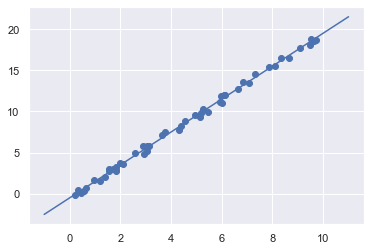

In [28]:
# Predict labels for unknown data
## Evaluate based on what the model says about new data
xfit = np.linspace(-1, 11)
Xfit = xfit[:, np.newaxis]
yfit = model.predict(Xfit)
plt.scatter(x,y)
plt.plot(xfit, yfit)

# Supervised Learning: Iris Classification

In [33]:
from sklearn.model_selection import train_test_split
from sklearn.naive_bayes import GaussianNB
from sklearn.metrics import accuracy_score
import seaborn as sns

In [35]:
iris = sns.load_dataset('iris')
X_iris = iris.drop('species',axis=1)
y_iris = iris['species']
Xtrain, Xtest, ytrain, ytest = train_test_split(X_iris, y_iris,random_state=1)

In [36]:
model = GaussianNB()
model.fit(Xtrain, ytrain)
y_model = model.predict(Xtest)
accuracy_score(ytest, y_model)

0.9736842105263158

# HyperParameters and Model Validation

1. Choose a class of models
2. Choose Model Hyperparameters
3. Fit the model to the training data
4. Use the model to predict labels for new data

# Model Validation the right way: Holdout sets

Hold back some subset of the data from the training of the model and then use this holdout set to check the model performance. Splitting can be done using the train test split in scikit-Learn

In [41]:
from sklearn.model_selection import train_test_split
from sklearn.datasets import load_iris
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score
iris = load_iris()
X = iris.data
y = iris.target
model = KNeighborsClassifier(n_neighbors=1)
# Split data with 50% in each set
x1,x2,y1,y2 = train_test_split(X,y,random_state=0,train_size = 0.5)

In [43]:
# fit the model on one set of data
model.fit(x1,y1)

# Evaluate model on the second set of data
y2_model = model.predict(x2)
accuracy_score(y2,y2_model)
# Hold out set is better because it has never seen the data

0.9066666666666666

# Model Validation via cross-validation

One disadvantage of using the holdout set for model validation is that we have lost a portion of our data to the model training. In the above case half the dataset doesnot contribute towards training of the model. This is not optimal and can cause problems

In [44]:
# We can use 2 validation trials, alternatively using each half of the data as 
# a holdout set
y2_model = model.fit(x1,y1).predict(x2)
y1_model = model.fit(x2,y2).predict(x1)
accuracy_score(y1,y1_model), accuracy_score(y2,y2_model)

(0.96, 0.9066666666666666)

We can create more groups other than the 2 fold cross-validation that has been performed above

In [47]:
from sklearn.model_selection import cross_val_score
cross_val_score(model,X,y,cv=5)

array([0.96666667, 0.96666667, 0.93333333, 0.93333333, 1.        ])

In [53]:
# Training on all points but one: leave-one-out cross validation
# In this our number of folds equals number of data points
# Train on all points but one in the dataset
# 1: Successful 0: Unsuccessful
from sklearn.model_selection import LeaveOneOut
scores = cross_val_score(model, X, y, cv=LeaveOneOut())
scores

array([1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
       1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
       1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
       1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
       1., 1., 0., 1., 0., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 0., 1.,
       1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
       1., 1., 1., 1., 0., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
       0., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 0., 1., 1.,
       1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.])

In [54]:
scores.mean()

0.96

# Selecting the best model

Determining what steps will improve your model seperates the successful machine learning practitioners from the unsuccessful


BIAS VARIANCE TRADEOFF


In the book python for datascience the first figure tries to find a linear relationship between the input and output variables and as a result results in a very bad fit. It doesnot have enough model flexibility to account for all the features in the data. It has high bias.


In the second figure the model has enough flexibility and tries to fit a higher order polynomial through the data. It overfits and this implies the model has high variance.




# Validation Curve

Very low model complexity(a high-bias model) the training data is under-fit which means the model is a poor predictor of both the training data and previously unseen data


For high model complexity(a high variance model) the training data is over fit which means the model predicts the training data very well but fails for unseen data


For some intermediate value like a bias variance tradeoff the validation curve has a maximum


Squared bias represents the extent to which the average prediction over all data sets differs from the desired regression function


Variance measures the extent to which the solutions for individual data sets vary around their average and hence measures the extent to which the function y is sensitive to a particular type of dataset.

In [71]:
from sklearn.preprocessing import PolynomialFeatures
from sklearn.linear_model import LinearRegression
from sklearn.pipeline import make_pipeline

# Using polynomial regression model to compute a validation curve
# Using pipeline to string together the transformations and multiple steps
# **kwargs is used to enter a variable number of input arguments to the function
# Degree 2 polynomial feature 
def PolynomialRegression(degree=2,**kwargs):
    return make_pipeline(PolynomialFeatures(degree),LinearRegression(**kwargs))

In [72]:
import numpy as np

def make_data(N, err=1.0, rseed=1):
    rng = np.random.RandomState(rseed)
    X = rng.rand(N,1) ** 2
    y = 10 - 1./(X.ravel() + 0.1)
    if err > 0:
        y+=err * rng.randn(N)
    return X,y
X,y = make_data(40)

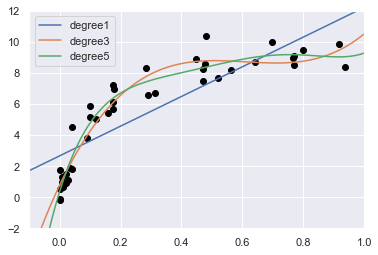

In [73]:
# Visualization of our data
%matplotlib inline
import matplotlib.pyplot as plt
import seaborn;
seaborn.set() # Plot formatting

X_test = np.linspace(-0.1,1.1,500)[:,None] # or [:,np.newaxis]
plt.scatter(X.ravel(),y,color='black')
axis = plt.axis()

for degree in [1,3,5]:
    y_test = PolynomialRegression(degree).fit(X,y).predict(X_test)
    plt.plot(X_test.ravel(), y_test, label='degree{0}'.format(degree))
plt.xlim(-0.1,1.0)
plt.ylim(-2,12)
plt.legend(loc='best')

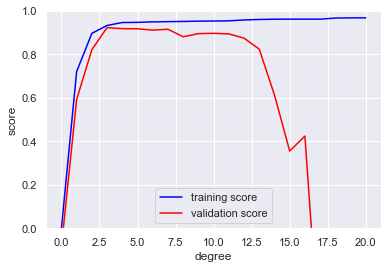

In [88]:
# What degree of the polynomial provides a suitable trade-off between bias and variance ?
# A low training score and a low validation score means the model is underfitting
# A high training score and a low validation score means the model is overfitting
# Optimal for all the other cases
from sklearn.model_selection import validation_curve
degree = np.arange(0,21)
# cv= cross validation splitting strategy
# PolynomialRegression is the estimator
# X and y are the training data and the target vector
# 21x7 matrix for train score and validation score
train_score, val_score = validation_curve(PolynomialRegression(), X, y, 
                                          'polynomialfeatures__degree', degree, cv=7)
plt.plot(degree, np.median(train_score, 1), color='blue', label='training score')
plt.plot(degree, np.median(val_score, 1), color='red', label='validation score')
plt.legend(loc='best')
plt.ylim(0, 1)
plt.xlabel('degree')
plt.ylabel('score');

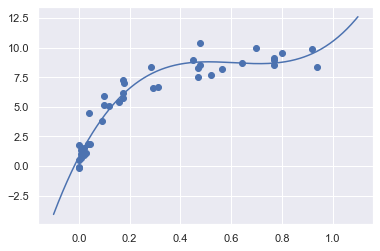

In [80]:
# reading from the above graph we can conclude that the optimal tradeoff between bias and variance is found for the third order variable
plt.scatter(X.ravel(),y)
lim = plt.axis()
y_test = PolynomialRegression(3).fit(X,y).predict(X_test)
plt.plot(X_test.ravel(),y_test)

# Learning Curves

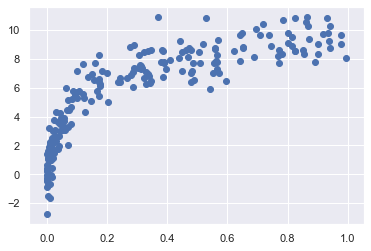

In [89]:
# Optimal model will depend on the size of the training data
# Lets generate a new dataset
X2, y2 = make_data(200)
plt.scatter(X2.ravel(), y2)

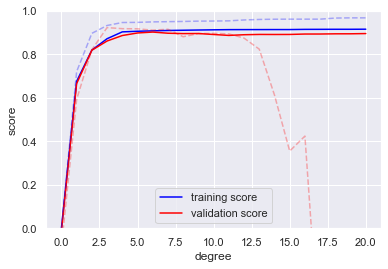

In [91]:
# PLot the validation curve for this and for reference over plot the previous
# results

degree = np.arange(21)
train_score2, val_score2 = validation_curve(PolynomialRegression(), X2, y2,
                                           'polynomialfeatures__degree',degree,cv=7)
plt.plot(degree, np.median(train_score2,1), color='blue', label='training score')
plt.plot(degree, np.median(val_score2, 1), color='red', label='validation score')
plt.plot(degree, np.median(train_score, 1), color='blue', alpha=0.3, linestyle='dashed')
plt.plot(degree, np.median(val_score, 1), color='red', alpha=0.3, linestyle='dashed')
plt.legend(loc='lower center')
plt.ylim(0, 1)
plt.xlabel('degree')
plt.ylabel('score');

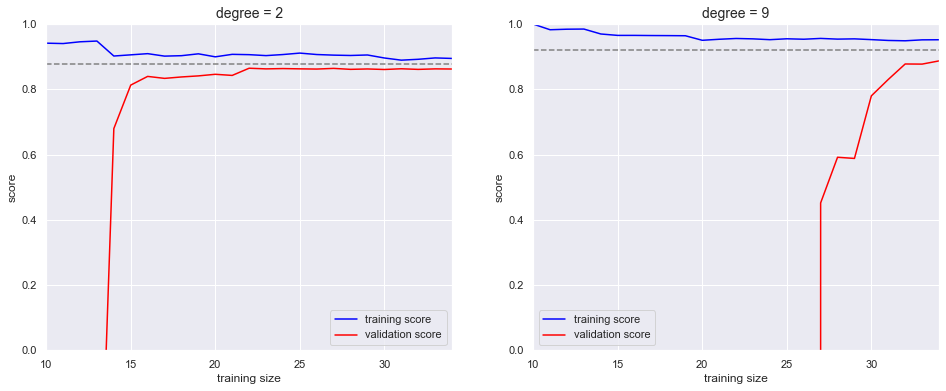

In [103]:
# From the above model we see that the validation curve has 2 inputs
# The model complexity and the number of training points
# PLOT OF THE TRAINING/VALIDATION SCORE WITH RESPECT TO THE SIZE OF THE 
# TRAINING SET IS CALLED LEARNING CURVE

from sklearn.model_selection import learning_curve
fig , ax = plt.subplots(1,2,figsize=(16,6))


for i , degree in enumerate([2, 9]):
    N, train_lc, val_lc = learning_curve(PolynomialRegression(degree), X, y, cv=7,
                                        train_sizes=np.linspace(0.3,1,25))
    ax[i].plot(N, np.mean(train_lc,1), color='blue', label='training score')
    ax[i].plot(N, np.mean(val_lc,1), color='red', label='validation score')
    ax[i].hlines(np.mean([train_lc[-1], val_lc[-1]]), N[0], N[-1],
                 color='gray', linestyle='dashed')
    ax[i].set_ylim(0,1)
    ax[i].set_xlim(N[0], N[-1])
    ax[i].set_xlabel('training size')
    ax[i].set_ylabel('score')
    ax[i].set_title('degree = {0}'.format(degree), size=14)
    ax[i].legend(loc='best')

Plotting a learning curve for the particular choice of model and dataset can help one make a decision about how to move forward improving the model.


For the degree 2 model with increase in training data we see that the model is converging. In this case it doesnot matter whether we introduct more training data or not.


In the degree 9 model we can see that with the increase in training data there is a high model variance but the training and validation curves evetually converge at the expense of high variance.

# Grid Search

scikit-learn gives us a module called GridSearchCV to find the optimal polynomial model to so as to accurately fit the model.

In [104]:
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import accuracy_score
param_grid = {'polynomialfeatures__degree':np.arange(21), 'linearregression__fit_intercept': [True, False], 
             'linearregression__normalize': [True, False]}
# The param grid is a dictionary with string is the keys and the parameters are 
# the range of values
grid = GridSearchCV(PolynomialRegression(), param_grid, cv=7)

In [105]:
grid.fit(X,y)

GridSearchCV(cv=7, error_score='raise-deprecating',
             estimator=Pipeline(memory=None,
                                steps=[('polynomialfeatures',
                                        PolynomialFeatures(degree=2,
                                                           include_bias=True,
                                                           interaction_only=False,
                                                           order='C')),
                                       ('linearregression',
                                        LinearRegression(copy_X=True,
                                                         fit_intercept=True,
                                                         n_jobs=None,
                                                         normalize=False))],
                                verbose=False),
             iid='warn', n_jobs=None,
             param_grid={'linearregression__fit_intercept': [True, False],
                        

In [106]:
grid.best_params_

{'linearregression__fit_intercept': False,
 'linearregression__normalize': True,
 'polynomialfeatures__degree': 4}

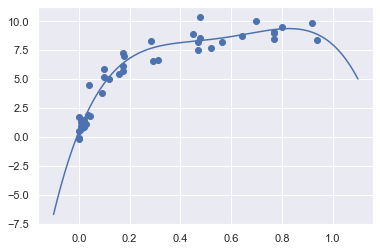

In [108]:
model = grid.best_estimator_

plt.scatter(X.ravel(), y)
lim = plt.axis()
y_test = model.fit(X, y).predict(X_test)
plt.plot(X_test.ravel(), y_test)
#plt.axis(lim)